In [11]:
from qdisk.plot import ChannelMap, Map
from eDisk_source_dict import source_dict
import matplotlib.pyplot as plt
from matplotlib import ticker
from astropy.visualization import AsinhStretch, SinhStretch
import matplotlib.patheffects as pe
from matplotlib import patches
import eDiskplot as eplot
from qdisk.classes import FitsImage
import numpy as np
import analysis_utils as au
%matplotlib widget
%load_ext autoreload
%autoreload 2

source = "L1489IRS"
config = "SBLB"
lines = ["12CO", "13CO", "C18O", "SO"]
robust = {"12CO": 0.5, "13CO": 1.0, "C18O": 1.0, "SO": 1.0}
dv = 0.2
center_coord = source_dict[source]["radec"]
PA = source_dict[source]["PA"]
incl = source_dict[source]["incl"]
distance = source_dict[source]["distance"]
vsys = source_dict[source]["vsys"]
vrange = 6

def arcsec2au(r):
    return r * distance

def au2arcsec(r):
    return r / distance

contimagename = "/raid/work/yamato/edisk_data/L1489IRS/custom_images/L1489IRS_SBLB_continuum_robust_1.0.pbcor.tt0.fits"

# continuum rms
contimage = FitsImage(contimagename)
contimage.estimate_rms(rmin=6)
contrms = contimage.rms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


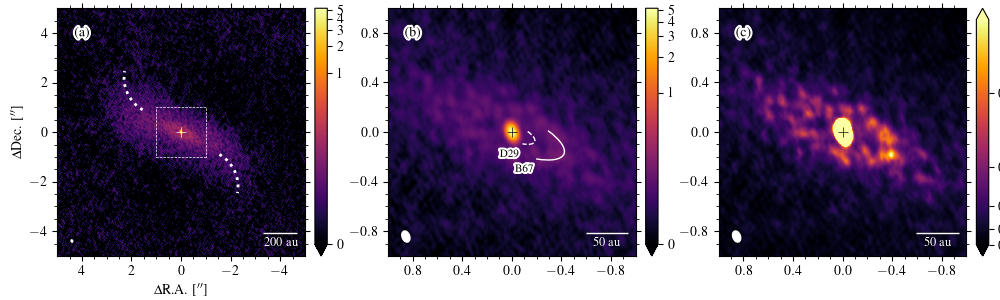

In [8]:
# continuum maps
fig, axes = plt.subplots(1,3, figsize=(10,3), constrained_layout=True)
ring_pos = 0.456
gap_pos = 0.2

# large scale view
ax = axes[0]
rmax = 5.0
contmap = Map(contimagename, ax=ax, data_scaling_factor=1e3, xlim=(-rmax, rmax), ylim=(-rmax, rmax), center_coord=center_coord)
contmap.plot_colormap(cmap=eplot.cmap["continuum"], vmin=0.0, stretch=AsinhStretch(a=0.005))
contmap.add_colorbar()
contmap.add_beam()
contmap.add_scalebar(scale=200. / distance, text="{:d} au".format(200))
contmap.set_labels(xlabel=eplot.RAlabel, ylabel=eplot.Declabel)
box = patches.Rectangle(
    xy=(-1, -1),
    width=2,
    height=2,
    fill=False,
    ls="dashed",
    color="white",
    lw=0.5,
)
arc1 = patches.Arc(
    xy=(-0.8, -2.2),
    width=3,
    height=3,
    theta1=120,
    theta2=190,
    color="white",
    ls="dotted",
    lw=2,
)
arc2 = patches.Arc(
    xy=(0.8, 2.2),
    width=3,
    height=3,
    theta1=120 + 180,
    theta2=190 + 180,
    color="white",
    ls="dotted",
    lw=2,
)
contmap.ax.add_artist(box)
contmap.ax.add_artist(arc1)
contmap.ax.add_artist(arc2)
contmap.ax.annotate(text="(a)", xy=(0.1, 0.9), xycoords="axes fraction", color="black", ha="center", va="center", path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()])
contmap.set_ticker(minor=True, majornticks=5, minornticks=5)
contmap.ax.scatter(0, 0, marker="+", s=50, color="white", linewidth=0.5)

# zoom in view
ax = axes[1]
rmax = 1.0
contmap = Map(contimagename, ax=ax, data_scaling_factor=1e3, xlim=(-rmax, rmax), ylim=(-rmax, rmax), center_coord=center_coord)
contmap.plot_colormap(cmap=eplot.cmap["continuum"], vmin=0.0, stretch=AsinhStretch(a=0.02))
contmap.add_colorbar()
contmap.add_beam()
contmap.add_scalebar(scale=50. / distance, text="{:d} au".format(50))
arc_ring = patches.Arc(
            xy=(0, 0),
            width=2 * ring_pos,
            height=2 * ring_pos * np.cos(np.radians(incl)),
            angle=90 - PA,
            color="white",
            theta1=155,
            theta2=205,
        )
contmap.ax.annotate(text="B{:.0f}".format(ring_pos*distance), xy=(-0.1, -0.3), color="black", ha="center", va="center", size=8, path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()])
arc_gap = patches.Arc(
    xy=(0, 0),
    width=2 * gap_pos,
    height=2 * gap_pos * np.cos(np.radians(incl)),
    angle=90 - PA,
    color="white",
    theta1=155,
    theta2=205,
    ls="dashed",
)
contmap.ax.annotate(text="D{:.0f}".format(gap_pos*distance), xy=(0.02, -0.18), color="black", ha="center", va="center", size=8, path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()])
contmap.ax.add_artist(arc_ring)
contmap.ax.add_artist(arc_gap)
contmap.ax.annotate(text="(b)", xy=(0.1, 0.9), xycoords="axes fraction", color="black", ha="center", va="center", path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()])
contmap.set_ticker(minor=True, majornticks=5, minornticks=5)
contmap.ax.scatter(0, 0, marker="+", s=50, color="black", linewidth=0.5)

# asymmetry
ax = axes[2]
rmax = 1.0
contmap = Map(contimagename, ax=ax, data_scaling_factor=1e3, xlim=(-rmax, rmax), ylim=(-rmax, rmax), center_coord=center_coord)
contmap.plot_colormap(cmap=eplot.cmap["continuum"], vmin=0.0, vmax=0.23, stretch=SinhStretch())
contmap.add_colorbar(label="mJy beam$^{-1}$")
contmap.add_beam()
contmap.add_scalebar(scale=50. / distance, text="{:d} au".format(50))
contmap.ax.annotate(text="(c)", xy=(0.1, 0.9), xycoords="axes fraction", color="black", ha="center", va="center", path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()])
contmap.set_ticker(minor=True, majornticks=5, minornticks=5)
contmap.ax.scatter(0, 0, marker="+", s=50, color="black", linewidth=0.5)

# fig.savefig("./figure/continuum_gallery.pdf", bbox_inches="tight", pad_inches=0.01)

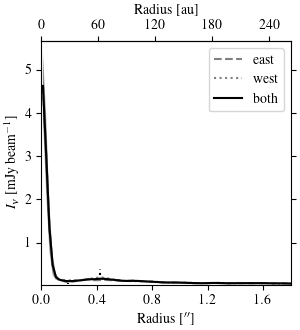

In [9]:
# radial profile of continuum
fig, ax = plt.subplots(figsize=(3, 3.3), constrained_layout=True)
# east
profilename = "./VADP/L1489IRS_SBLB_continuum_robust_1.0.pbcor.tt0_radialProfileWedge45deg_east.txt"
r, I, dI = np.loadtxt(profilename, unpack=True)
I *= 1e3
dI *=1e3
ax.plot(r, I, color="grey", label="east", ls="dashed")
ax.fill_between(r, I-dI, I+dI, alpha=0.2, color="black", edgecolor=None)
# west
profilename = "./VADP/L1489IRS_SBLB_continuum_robust_1.0.pbcor.tt0_radialProfileWedge45deg_west.txt"
r, I, dI = np.loadtxt(profilename, unpack=True)
I *= 1e3
dI *=1e3
ax.plot(r, I, color="grey", label="west", ls="dotted")
ax.fill_between(r, I-dI, I+dI, alpha=0.2, color="black", edgecolor=None)
# full
profilename = "./VADP/L1489IRS_SBLB_continuum_robust_1.0.pbcor.tt0_radialProfileWedge45deg.txt"
r, I, dI = np.loadtxt(profilename, unpack=True)
I *= 1e3
dI *=1e3
ax.plot(r, I, color="black", label="both")
ax.fill_between(r, I-dI, I+dI, alpha=0.2, color="black", edgecolor=None)

topax = ax.secondary_xaxis("top", functions=(arcsec2au, au2arcsec))
topax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.tick_params(top=False)
ax.set(yscale="linear", xlim=(0, 1.8), ylim=(2e-2, None), xlabel="Radius [$^{\prime\prime}$]", ylabel="$I_\\nu$ [mJy beam$^{-1}$]")
topax.set(xlabel="Radius [au]")
ax.legend()

ax.vlines(x=0.42, ymin=2.5e-1, ymax=4e-1, color="black", ls="dotted")
ax.vlines(x=0.19, ymin=7e-2, ymax=4e-2, color="black", ls="dotted")

# fig.savefig("./figure/continuum_radial_profile.pdf", bbox_inches="tight", pad_inches=0.01)

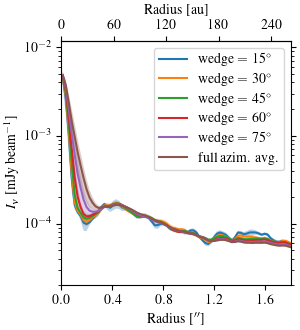

In [3]:
# radial profile of continuum, wedge comparison
fig, ax = plt.subplots(figsize=(3, 3.3), constrained_layout=True)
wedge = [15, 30, 45, 60, 75, 90]

for w in wedge:
    profilename = "./VADP/L1489IRS_SBLB_continuum_robust_1.0.pbcor.tt0_radialProfileWedge{:d}deg.txt".format(w)
    r, I, dI = np.loadtxt(profilename, unpack=True)
    ax.plot(r, I, label="wedge $=$ {}$^\circ$".format(w) if not w == 90 else "full azim. avg.".format(w))
    ax.fill_between(r, I-dI, I+dI, alpha=0.3)


topax = ax.secondary_xaxis("top", functions=(arcsec2au, au2arcsec))
topax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.tick_params(top=False)
ax.set(yscale="log", xlim=(0, 1.8), ylim=(2e-5, None), xlabel="Radius [$^{\prime\prime}$]", ylabel="$I_\\nu$ [mJy beam$^{-1}$]")
topax.set(xlabel="Radius [au]")
ax.legend()

# fig.savefig("./figure/comparison_cont_profile_wedge.pdf", bbox_inches="tight", pad_inches=0.01)

Generating threshold mask...
Done.


Text(0.1, 0.9, '(c)')

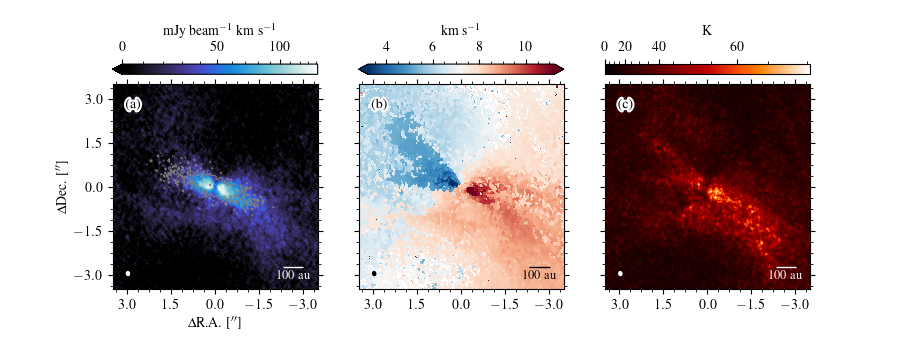

In [14]:
### moment maps of 13CO
line = "13CO"
imagename = au.customimagepath + au.get_image_basename(
    source=source, baseline=config, line=line, robust=robust[line], dv=dv
)
fig, axes = plt.subplots(
    1, 3, figsize=(9, 3.5), sharex=True, sharey=True
)  # , constrained_layout=True)
rmax = 3.5
scale = 100  # in au

# moment0
ax = axes[0]
mom0name = au.VADPpath + au.get_image_basename(
    source=source, baseline=config, line=line, robust=robust[line], dv=dv
).replace(".fits", "_M0.fits")
mom0map = Map(
    mom0name, ax=ax, center_coord=center_coord, xlim=(-rmax, rmax), ylim=(-rmax, rmax)
)
mom0map.estimate_rms(edgenchan=3)
mom0map.plot_colormap(cmap=eplot.cmap["M0"], vmin=0.0, stretch=AsinhStretch(a=0.4))
mom0map.overlay_contour(contimagename, levels=np.array([4])*contrms, linewidth=0.7)
mom0map.add_colorbar(
    position="top", label="mJy beam$^{-1}$ km s$^{-1}$", rotation=0, labelpad=5
)
mom0map.add_beam()
mom0map.add_scalebar(scale=scale / distance, text=str(scale) + " au")
mom0map.colorbar.ax.minorticks_on()
mom0map.set_ticker(majornticks=5, minor=True, minornticks=4)
mom0map.set_labels(
    xlabel="$\Delta$R.A. [$^{\prime\prime}$]", ylabel="$\Delta$Dec. [$^{\prime\prime}$]"
)
# mom0map.ax.scatter(0, 0, marker="+", s=50, color="white", linewidth=1)
mom0map.ax.annotate(
    text="(a)",
    xy=(0.1, 0.9),
    xycoords="axes fraction",
    color="black",
    ha="center",
    va="center",
    path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
)

# v0map
ax = axes[1]
vrange = 4
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
cube.shift_phasecenter_toward(center_coord)
print("Generating threshold mask...")
cube.estimate_rms(edgenchan=3)
cube.get_threshold_mask(threshold=4)
mask = np.sum(cube.threshold_mask, axis=0) > 0
print("Done.")
v0name = au.VADPpath + au.get_image_basename(
    source=source, baseline=config, line=line, robust=robust[line], dv=dv
).replace(".fits", "_v0.fits")
v0map = Map(
    v0name,
    ax=ax,
    center_coord=center_coord,
    xlim=(-rmax, rmax),
    ylim=(-rmax, rmax),
    data_scaling_factor=1e-3,
    invert_xaxis=False,
)
v0map.mask(vmin=vsys - 2, vmax=vsys + 2, user_mask=mask, combine="or")
v0map.plot_colormap(cmap=eplot.cmap["M1"], vmin=vsys - vrange, vmax=vsys + vrange)
v0map.add_colorbar(position="top", label="km s$^{-1}$", rotation=0, labelpad=5)
v0map.add_beam(color="black")
v0map.add_scalebar(scale=scale / distance, text=str(scale) + " au", color="black")
# v0map.ax.scatter(0, 0, marker="+", s=50, color="black", linewidth=0.5)
v0map.colorbar.ax.minorticks_on()
v0map.ax.annotate(
    text="(b)",
    xy=(0.1, 0.9),
    xycoords="axes fraction",
    color="black",
    ha="center",
    va="center",
    path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
)

# M8map
ax = axes[2]
mom8name = au.VADPpath + au.get_image_basename(
    source=source, baseline=config, line=line, robust=robust[line], dv=dv
).replace(".fits", "_Fnu.fits")
peakmap = Map(
    mom8name,
    ax=ax,
    center_coord=center_coord,
    xlim=(-rmax, rmax),
    ylim=(-rmax, rmax),
    invert_xaxis=False,
)
peakmap.convert_unit()
peakmap.plot_colormap(cmap=eplot.cmap["M8"], vmin=0.0, stretch=SinhStretch())
peakmap.add_colorbar(position="top", label="K", rotation=0, labelpad=5)
peakmap.add_beam()
peakmap.add_scalebar(scale=scale / distance, text=str(scale) + " au")
# peakmap.ax.scatter(0, 0, marker="+", s=50, color="white", linewidth=0.5)
peakmap.colorbar.ax.minorticks_on()
peakmap.ax.annotate(
    text="(c)",
    xy=(0.1, 0.9),
    xycoords="axes fraction",
    color="black",
    ha="center",
    va="center",
    path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
)


In [7]:
fig.savefig(au.figurepath + "13CO_maps.pdf", bbox_inches="tight", pad_inches=0.01)

Generating threshold mask...
Done.


Text(0.1, 0.9, '(c)')

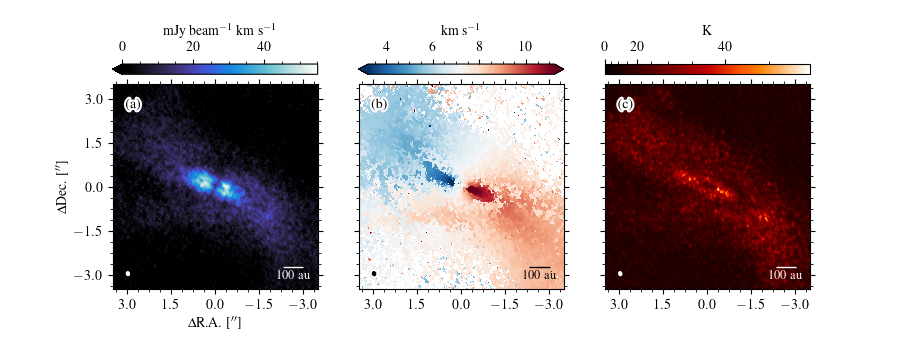

In [8]:
### moment maps of C18O
line = "C18O"
imagename = au.customimagepath + au.get_image_basename(
    source=source, baseline=config, line=line, robust=robust[line], dv=dv
)
fig, axes = plt.subplots(
    1, 3, figsize=(9, 3.5), sharex=True, sharey=True
)  # , constrained_layout=True)
rmax = 3.5
scale = 100  # in au

# moment0
ax = axes[0]
mom0name = au.VADPpath + au.get_image_basename(
    source=source, baseline=config, line=line, robust=robust[line], dv=dv
).replace(".fits", "_M0.fits")
mom0map = Map(
    mom0name, ax=ax, center_coord=center_coord, xlim=(-rmax, rmax), ylim=(-rmax, rmax)
)
mom0map.plot_colormap(cmap=eplot.cmap["M0"], vmin=0.0)
mom0map.add_colorbar(
    position="top", label="mJy beam$^{-1}$ km s$^{-1}$", rotation=0, labelpad=5
)
mom0map.add_beam()
mom0map.add_scalebar(scale=scale / distance, text=str(scale) + " au")
mom0map.colorbar.ax.minorticks_on()
mom0map.set_ticker(majornticks=5, minor=True, minornticks=4)
mom0map.set_labels(
    xlabel="$\Delta$R.A. [$^{\prime\prime}$]", ylabel="$\Delta$Dec. [$^{\prime\prime}$]"
)
mom0map.ax.annotate(
    text="(a)",
    xy=(0.1, 0.9),
    xycoords="axes fraction",
    color="black",
    ha="center",
    va="center",
    path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
)

# v0map
ax = axes[1]
vrange = 4
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
cube.shift_phasecenter_toward(center_coord)
print("Generating threshold mask...")
cube.estimate_rms(edgenchan=3)
cube.get_threshold_mask(threshold=4)
mask = np.sum(cube.threshold_mask, axis=0) > 0
print("Done.")
v0name = au.VADPpath + au.get_image_basename(
    source=source, baseline=config, line=line, robust=robust[line], dv=dv
).replace(".fits", "_v0.fits")
v0map = Map(
    v0name,
    ax=ax,
    center_coord=center_coord,
    xlim=(-rmax, rmax),
    ylim=(-rmax, rmax),
    data_scaling_factor=1e-3,
    invert_xaxis=False,
)
v0map.mask(vmin=vsys - 2, vmax=vsys + 2, user_mask=mask, combine="or")
v0map.plot_colormap(cmap=eplot.cmap["M1"], vmin=vsys - vrange, vmax=vsys + vrange)
v0map.add_colorbar(position="top", label="km s$^{-1}$", rotation=0, labelpad=5)
v0map.add_beam(color="black")
v0map.add_scalebar(scale=scale / distance, text=str(scale) + " au", color="black")
v0map.colorbar.ax.minorticks_on()
v0map.ax.annotate(
    text="(b)",
    xy=(0.1, 0.9),
    xycoords="axes fraction",
    color="black",
    ha="center",
    va="center",
    path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
)

# M8map
ax = axes[2]
mom8name = au.VADPpath + au.get_image_basename(
    source=source, baseline=config, line=line, robust=robust[line], dv=dv
).replace(".fits", "_Fnu.fits")
peakmap = Map(
    mom8name,
    ax=ax,
    center_coord=center_coord,
    xlim=(-rmax, rmax),
    ylim=(-rmax, rmax),
    invert_xaxis=False,
)
peakmap.convert_unit()
peakmap.plot_colormap(cmap=eplot.cmap["M8"], vmin=0.0, stretch=SinhStretch())
peakmap.add_colorbar(position="top", label="K", rotation=0, labelpad=5)
peakmap.add_beam()
peakmap.add_scalebar(scale=scale / distance, text=str(scale) + " au")
peakmap.colorbar.ax.minorticks_on()
peakmap.ax.annotate(
    text="(c)",
    xy=(0.1, 0.9),
    xycoords="axes fraction",
    color="black",
    ha="center",
    va="center",
    path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
)


In [9]:
fig.savefig(au.figurepath + "C18O_maps.pdf", bbox_inches="tight", pad_inches=0.01)

Generating threshold mask...
Done.


Text(0.1, 0.9, '(c)')

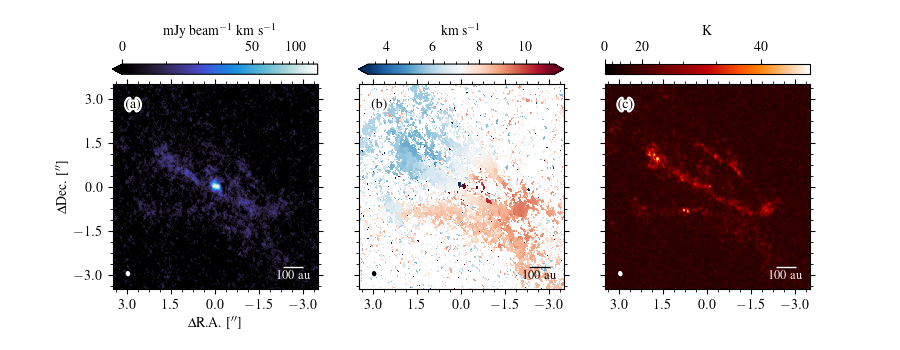

In [10]:
### moment maps of SO
line = "SO"
imagename = au.customimagepath + au.get_image_basename(source=source, baseline=config, line=line, robust=robust[line], dv=dv)
fig, axes = plt.subplots(1, 3, figsize=(9,3.5), sharex=True, sharey=True)#, constrained_layout=True)
rmax = 3.5
scale = 100 # in au

# moment0
ax = axes[0]
mom0name = au.VADPpath + au.get_image_basename(source=source, baseline=config, line=line, robust=robust[line], dv=dv).replace(".fits", "_M0.fits")
mom0map = Map(mom0name, ax=ax, center_coord=center_coord, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
mom0map.plot_colormap(cmap=eplot.cmap["M0"], vmin=0.0, stretch=AsinhStretch())
mom0map.add_colorbar(position="top", label="mJy beam$^{-1}$ km s$^{-1}$", rotation=0, labelpad=5)
mom0map.add_beam()
mom0map.add_scalebar(scale=scale/distance, text=str(scale)+" au")
mom0map.colorbar.ax.minorticks_on()
mom0map.set_ticker(majornticks=5, minor=True, minornticks=4)
mom0map.set_labels(xlabel="$\Delta$R.A. [$^{\prime\prime}$]", ylabel="$\Delta$Dec. [$^{\prime\prime}$]")
mom0map.ax.annotate(
    text="(a)",
    xy=(0.1, 0.9),
    xycoords="axes fraction",
    color="black",
    ha="center",
    va="center",
    path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
)

# v0map
ax = axes[1]
vrange = 4
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
cube.shift_phasecenter_toward(center_coord)
print("Generating threshold mask...")
cube.estimate_rms(edgenchan=3)
cube.get_threshold_mask(threshold=4)
mask = np.sum(cube.threshold_mask, axis=0) > 0
print("Done.")
v0name = au.VADPpath + au.get_image_basename(source=source, baseline=config, line=line, robust=robust[line], dv=dv).replace(".fits", "_v0.fits")
v0map = Map(v0name, ax=ax, center_coord=center_coord, xlim=(-rmax, rmax), ylim=(-rmax, rmax), data_scaling_factor=1e-3, invert_xaxis=False)
v0map.mask(vmin=vsys-2, vmax=vsys+2, user_mask=mask, combine="or")
v0map.plot_colormap(cmap=eplot.cmap["M1"], vmin=vsys-vrange, vmax=vsys+vrange)
v0map.add_colorbar(position="top", label="km s$^{-1}$", rotation=0, labelpad=5)
v0map.add_beam(color="black")
v0map.add_scalebar(scale=scale/distance, text=str(scale)+" au", color="black")
v0map.colorbar.ax.minorticks_on()
v0map.ax.annotate(
    text="(b)",
    xy=(0.1, 0.9),
    xycoords="axes fraction",
    color="black",
    ha="center",
    va="center",
    path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
)

# M8map
ax = axes[2]
mom8name = au.VADPpath + au.get_image_basename(source=source, baseline=config, line=line, robust=robust[line], dv=dv).replace(".fits", "_Fnu.fits")
peakmap = Map(mom8name, ax=ax, center_coord=center_coord, xlim=(-rmax, rmax), ylim=(-rmax, rmax), invert_xaxis=False)
peakmap.convert_unit()
peakmap.plot_colormap(cmap=eplot.cmap["M8"], vmin=0.0, stretch=SinhStretch())
peakmap.add_colorbar(position="top", label="K", rotation=0, labelpad=5)
peakmap.add_beam()
peakmap.add_scalebar(scale=scale/distance, text=str(scale)+" au")
peakmap.colorbar.ax.minorticks_on()
peakmap.ax.annotate(
    text="(c)",
    xy=(0.1, 0.9),
    xycoords="axes fraction",
    color="black",
    ha="center",
    va="center",
    path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
)

In [11]:
fig.savefig(au.figurepath + "SO_maps.pdf", bbox_inches="tight", pad_inches=0.01)

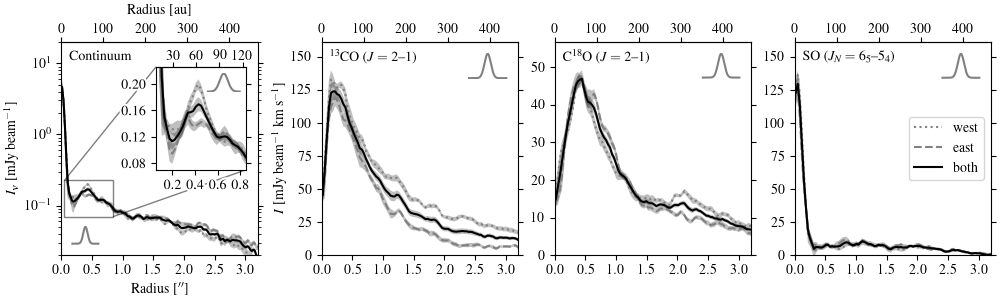

In [26]:
### radial profiles

### add beam prfoiel
def add_beam_profile(ax, beam, width_aspect=0.2, loc="upper right", aspect=0.6):
    xmin, xmax = ax.get_xlim()
    width = beam / (xmax - xmin) / width_aspect
    height = width * aspect
    if loc == "upper right":
        loc = [0.95-width, 0.95-height, width, height]
    elif loc == "lower left":
        loc = [0.05, 0.05, width, height]
    insax = ax.inset_axes(loc)
    x = np.arange(-0.5, 0.5, 0.001)
    beam_sigma = au.FWHM_to_sigma(width_aspect)
    y = np.exp(- x**2/(2*beam_sigma**2))
    insax.plot(x, y, color="grey")
    insax.axis("off")
    


fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharex=True, constrained_layout=True)
lines = ["continuum", "13CO", "C18O", "SO"]
robust = 1.0
dv = 0.2

# ax_list = []

for i, line in enumerate(lines):
    for side in ["West", "East", ""]:
        if line == "continuum":
            profilename = au.VADPpath + au.get_image_basename(
                source=source, line=line, baseline=config, robust=robust, type="pbcor"
            ).replace(".fits", f"_radialProfileWedge45deg{side}.txt")
        else:
            profilename = au.VADPpath + au.get_image_basename(
                source=source, line=line, baseline=config, robust=robust, dv=dv
            ).replace(".fits", f"_radialProfileWedge45deg{side}.txt")

        r, I, dI = np.loadtxt(profilename, unpack=True)
        if line == "continuum":
            I *= 1e3
            dI *= 1e3

        ax = axes[i]
        color = "black" if side == "" else "grey"
        ls = "solid" if side == "" else "dotted" if side == "West" else "dashed"
        ax.plot(r, I, color=color, ls=ls, label=side.lower() if side != "" else "both")
        ax.fill_between(r, I-dI, I+dI, alpha=0.25, facecolor="black", edgecolor=None)
        ax.set(xlim=(0, 3.2))

    topax = ax.secondary_xaxis("top", functions=(arcsec2au, au2arcsec))
    topax.xaxis.set_major_locator(ticker.MultipleLocator(100))
    topax.tick_params(axis='x', which='major', pad=1)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    # ax.minorticks_on()
    ax.tick_params(top=False)
    

    if line == "continuum":
        ax.set(yscale="log", ylim=(2e-2, 2e1), ylabel="$I_\\nu$ [mJy beam$^{-1}$]", xlabel="Radius [$^{\prime\prime}$]")
        topax.set_xlabel("Radius [au]", labelpad=7)
        # topax.set
        # topax.minorticks_on()
        ax.annotate(
            text="Continuum",
            xy=(0.04, 0.93),
            xycoords="axes fraction",
            color="black",
            ha="left",
            va="center",
            path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
        )
        add_beam_profile(ax, beam=4*np.diff(r).mean(), loc="lower left")

        # inset axis for zoom
        insax = ax.inset_axes([0.48, 0.4, 0.46, 0.48])
        xmin, xmax, ymin, ymax = 0.05, 0.85, 0.07, 0.225
        insax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
        topinsax = insax.secondary_xaxis("top", functions=(arcsec2au, au2arcsec))
        insax.tick_params(top=False)
        topinsax.xaxis.set_major_locator(ticker.MultipleLocator(30))
        topinsax.tick_params(axis='x', which='major', pad=0.1)
        insax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
        insax.yaxis.set_major_locator(ticker.MultipleLocator(0.04))

        # set patheffect
        for ticks in insax.get_xticklabels():
            ticks.set_path_effects([pe.Stroke(linewidth=3, foreground="white"), pe.Normal()])
        for ticks in insax.get_yticklabels():
            ticks.set_path_effects([pe.Stroke(linewidth=3, foreground="white"), pe.Normal()])
        for side in ["West", "East", ""]:
            profilename = au.VADPpath + au.get_image_basename(
                    source=source, line=line, baseline=config, robust=robust, type="pbcor"
                ).replace(".fits", f"_radialProfileWedge45deg{side}.txt")

            r, I, dI = np.loadtxt(profilename, unpack=True)
            I *= 1e3
            dI *= 1e3

            color = "black" if side == "" else "grey"
            ls = "solid" if side == "" else "dotted" if side == "West" else "dashed"
            insax.plot(r, I, color=color, ls=ls)
            insax.fill_between(r, I-dI, I+dI, alpha=0.25, facecolor="black", edgecolor=None)
        ax.indicate_inset_zoom(insax, edgecolor="black")
        add_beam_profile(insax, beam=4*np.diff(r).mean(), aspect=0.5, width_aspect=0.3)
    else:
        ax.set(ylim=(0.0, ax.get_ylim()[1]*1.1), yscale="linear")
        ax.annotate(
            text=eplot.linelabel[line],
            xy=(0.04, 0.93),
            xycoords="axes fraction",
            color="black",
            ha="left",
            va="center",
            path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
        )
        add_beam_profile(ax, beam=4*np.diff(r).mean(), loc="upper right")

    # ax_list.append(ax)

# axes[0].get_shared_y_axes().join(axes[0], *axes)
# axes[2].sharey(axes[1])
# axes[3].sharey(axes[1])
axes[1].set(ylabel="$I$ [mJy beam$^{-1}$ km s$^{-1}$]")#, xlabel="Radius [$^{\prime\prime}$]")
axes[3].legend(loc="center right")

# ax = axes[3]
# beam = 4*np.diff(r).mean()
# xmin, xmax = ax.get_xlim()
# width = 5*beam / (xmax - xmin)
# height = width * 0.6
# insax = ax.inset_axes([0.95-width, 0.95-height, width, height])
# x = np.arange(-0.5, 0.5, 0.001)
# from analysis_utils import FWHM_to_sigma
# beam_sigma = FWHM_to_sigma(0.2)
# y = np.exp(- x**2/(2*beam_sigma**2))
# insax.plot(x, y, color="grey")
# insax.axis("off")

        


In [28]:
fig.savefig("./figure/radial_emission_profile.pdf", bbox_inches="tight", pad_inches=0.01)

In [121]:
insax.get_xticklabels()

[Text(0.0, 0, ''),
 Text(0.25, 0, ''),
 Text(0.5, 0, ''),
 Text(0.75, 0, ''),
 Text(1.0, 0, '')]

In [15]:
250/146

1.7123287671232876